# PyTorch Tensor Basics - Interactive Tutorial

**Part 1: Foundation**

This notebook provides an interactive exploration of PyTorch tensors, covering:
- Tensor creation and attributes
- Basic operations and matrix multiplication
- Broadcasting mechanics
- Reshaping and indexing
- Device management (CPU/GPU)
- Autograd fundamentals
- Complete linear regression example

In [3]:
# Import required libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.9.0+cu126
CUDA available: True
CUDA device: Tesla T4


## 1. Creating Tensors

Tensors are the fundamental data structure in PyTorch. Let's explore different ways to create them.

In [4]:
# From Python lists
list_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("From list:")
print(list_tensor)
print(f"Shape: {list_tensor.shape}, Dtype: {list_tensor.dtype}\n")

# From NumPy arrays
numpy_array = np.array([[1.0, 2.0], [3.0, 4.0]])
numpy_tensor = torch.from_numpy(numpy_array)
print("From NumPy:")
print(numpy_tensor)
print(f"Shape: {numpy_tensor.shape}, Dtype: {numpy_tensor.dtype}")

From list:
tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3]), Dtype: torch.int64

From NumPy:
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
Shape: torch.Size([2, 2]), Dtype: torch.float64


In [5]:
# Common initialization patterns
zeros = torch.zeros(2, 3)
ones = torch.ones(3, 2)
random_uniform = torch.rand(2, 2)  # we sample values from a uniform distribution. Uniform [0, 1)
random_normal = torch.randn(2, 2)  # we sample values from a normal distribution. Normal N(0, 1)
identity = torch.eye(3)

print("Zeros (2×3):")
print(zeros)
print("\nOnes (3×2):")
print(ones)
print("\nRandom Uniform (2×2):")
print(random_uniform)
print("\nRandom Normal (2×2):")
print(random_normal)
print("\nIdentity (3×3):")
print(identity)

Zeros (2×3):
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones (3×2):
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

Random Uniform (2×2):
tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]])

Random Normal (2×2):
tensor([[ 0.2345,  0.2303],
        [-1.1229, -0.1863]])

Identity (3×3):
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


### Exercise 1.1
Create a 4×4 tensor filled with values from 0 to 15 using `torch.arange()` and `.reshape()`

In [6]:
# Your code here
exercise_tensor = torch.arange(16).reshape(4, 4)
print(exercise_tensor)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])


## 2. Tensor Operations

PyTorch supports a wide range of operations on tensors.

In [7]:
# Element-wise operations
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print(f"a = {a}")
print(f"b = {b}")
print(f"\na + b = {a + b}")
print(f"a * b = {a * b}")
print(f"a ** 2 = {a ** 2}")
print(f"sqrt(a) = {torch.sqrt(a)}")

a = tensor([1., 2., 3.])
b = tensor([4., 5., 6.])

a + b = tensor([5., 7., 9.])
a * b = tensor([ 4., 10., 18.])
a ** 2 = tensor([1., 4., 9.])
sqrt(a) = tensor([1.0000, 1.4142, 1.7321])


In [8]:
# Matrix multiplication - THE MOST IMPORTANT OPERATION
A = torch.randn(3, 4)
B = torch.randn(4, 2)

print(f"A shape: {A.shape}")
print(f"B shape: {B.shape}")

# Three equivalent ways
C1 = torch.matmul(A, B)
C2 = A @ B  # RECOMMENDED
C3 = A.mm(B)

print(f"\nC = A @ B")
print(f"C shape: {C1.shape}")
print(f"All methods equal: {torch.allclose(C1, C2) and torch.allclose(C2, C3)}")

A shape: torch.Size([3, 4])
B shape: torch.Size([4, 2])

C = A @ B
C shape: torch.Size([3, 2])
All methods equal: True


### Exercise 2.1
Create two random matrices of shape (5, 3) and (3, 7) and multiply them. What's the resulting shape?

In [9]:
# Your code here
X = torch.randn(5, 3)
Y = torch.randn(3, 7)
Z = X @ Y
print(f"Result shape: {Z.shape}")  # Should be (5, 7)

Result shape: torch.Size([5, 7])


## 3. Broadcasting

Broadcasting allows operations on tensors of different shapes.

In [10]:
# Example 1: Vector + Scalar
vector = torch.tensor([1, 2, 3])
scalar = 10
result = vector + scalar
print(f"{vector} + {scalar} = {result}")

# Example 2: Matrix + Vector (broadcast to each row)
matrix = torch.arange(12).reshape(3, 4)
vector = torch.tensor([1, 2, 3, 4])
result = matrix + vector

print(f"\nMatrix (3×4):\n{matrix}")
print(f"\nVector (4): {vector}")
print(f"\nResult (3×4):\n{result}")

tensor([1, 2, 3]) + 10 = tensor([11, 12, 13])

Matrix (3×4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Vector (4): tensor([1, 2, 3, 4])

Result (3×4):
tensor([[ 1,  3,  5,  7],
        [ 5,  7,  9, 11],
        [ 9, 11, 13, 15]])


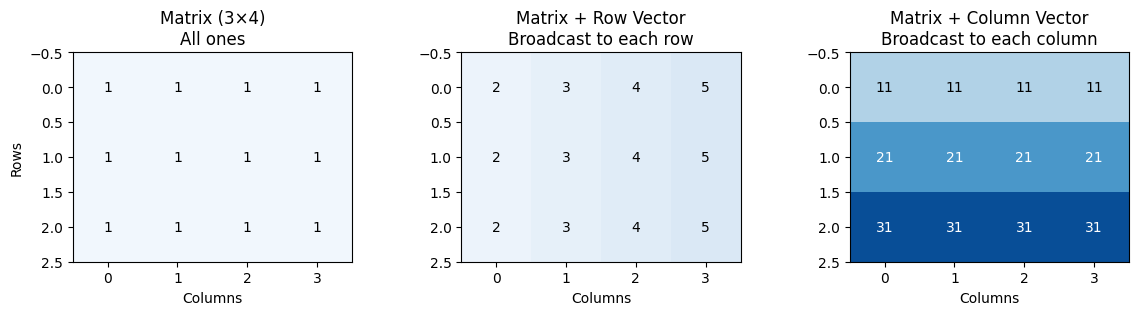

In [11]:
# Visualize broadcasting
matrix = torch.ones(3, 4)
row_vector = torch.tensor([[1, 2, 3, 4]])
col_vector = torch.tensor([[10], [20], [30]])

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].imshow(matrix.numpy(), cmap='Blues', vmin=0, vmax=35)
axes[0].set_title('Matrix (3×4)\nAll ones')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Rows')

result_row = matrix + row_vector
axes[1].imshow(result_row.numpy(), cmap='Blues', vmin=0, vmax=35)
axes[1].set_title('Matrix + Row Vector\nBroadcast to each row')
axes[1].set_xlabel('Columns')

result_col = matrix + col_vector
axes[2].imshow(result_col.numpy(), cmap='Blues', vmin=0, vmax=35)
axes[2].set_title('Matrix + Column Vector\nBroadcast to each column')
axes[2].set_xlabel('Columns')

for ax in axes:
    for i in range(3):
        for j in range(4):
            if ax == axes[0]:
                val = matrix[i, j].item()
            elif ax == axes[1]:
                val = result_row[i, j].item()
            else:
                val = result_col[i, j].item()
            ax.text(j, i, f'{val:.0f}', ha='center', va='center', color='white' if val > 15 else 'black')

plt.tight_layout()
plt.show()

## 4. Reshaping and Indexing

In [12]:
# Reshaping
x = torch.arange(24)
print(f"Original (24): {x}")

x_2d = x.view(4, 6)
print(f"\nReshaped to (4×6):\n{x_2d}")

x_3d = x.view(2, 3, 4)
print(f"\nReshaped to (2×3×4): shape {x_3d.shape}")

# Automatic dimension inference
auto = x.view(4, -1)  # -1 infers the dimension
print(f"\nAuto-inferred (4, -1): {auto.shape}")

Original (24): tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])

Reshaped to (4×6):
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])

Reshaped to (2×3×4): shape torch.Size([2, 3, 4])

Auto-inferred (4, -1): torch.Size([4, 6])


In [13]:
# Indexing and slicing
matrix = torch.arange(20).reshape(4, 5)
print(f"Matrix (4×5):\n{matrix}")

print(f"\nFirst row: {matrix[0]}")
print(f"Last column: {matrix[:, -1]}")
print(f"Sub-matrix [1:3, 2:4]:\n{matrix[1:3, 2:4]}")

# Boolean indexing
mask = matrix > 10
print(f"\nElements > 10: {matrix[mask]}")

Matrix (4×5):
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])

First row: tensor([0, 1, 2, 3, 4])
Last column: tensor([ 4,  9, 14, 19])
Sub-matrix [1:3, 2:4]:
tensor([[ 7,  8],
        [12, 13]])

Elements > 10: tensor([11, 12, 13, 14, 15, 16, 17, 18, 19])


## 5. Device Management (CPU/GPU)

In [14]:
# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create tensor on device
x = torch.randn(3, 3, device=device)
print(f"\nTensor device: {x.device}")

# Move tensor to CPU (safe even if already on CPU)
x_cpu = x.cpu()
print(f"After .cpu(): {x_cpu.device}")

Using device: cuda

Tensor device: cuda:0
After .cpu(): cpu


In [15]:
# Performance comparison (if GPU available)
import time

size = 2000
cpu_x = torch.randn(size, size)
cpu_y = torch.randn(size, size)

start = time.time()
cpu_z = cpu_x @ cpu_y
cpu_time = time.time() - start

print(f"CPU time: {cpu_time:.4f} seconds")

if torch.cuda.is_available():
    gpu_x = cpu_x.to('cuda')
    gpu_y = cpu_y.to('cuda')
    
    # Warm-up
    _ = gpu_x @ gpu_y
    
    torch.cuda.synchronize()
    start = time.time()
    gpu_z = gpu_x @ gpu_y
    torch.cuda.synchronize()
    gpu_time = time.time() - start
    
    print(f"GPU time: {gpu_time:.4f} seconds")
    print(f"Speedup: {cpu_time/gpu_time:.2f}x")
else:
    print("GPU not available")

CPU time: 0.2264 seconds
GPU time: 0.0062 seconds
Speedup: 36.40x


## 6. Autograd: Automatic Differentiation

The magic behind neural network training!

In [16]:
# Simple gradient computation
x = torch.tensor(2.0, requires_grad=True)
print(f"x = {x}")
print(f"x.requires_grad = {x.requires_grad}")

# Function: y = x^2
y = x ** 2
print(f"\ny = x^2 = {y}")
print(f"y.grad_fn = {y.grad_fn}")

# Compute gradient dy/dx = 2x
y.backward()
print(f"\nAfter y.backward():")
print(f"dy/dx = {x.grad} (expected: 2*2 = 4)")

x = 2.0
x.requires_grad = True

y = x^2 = 4.0
y.grad_fn = <PowBackward0 object at 0x7fa4bfd940a0>

After y.backward():
dy/dx = 4.0 (expected: 2*2 = 4)


In [17]:
# Multi-variable gradients
a = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(4.0, requires_grad=True)

# f(a, b) = a^2 * b + b^3
f = a ** 2 * b + b ** 3

print(f"a = {a.item()}, b = {b.item()}")
print(f"f(a, b) = a^2 * b + b^3 = {f.item()}")

f.backward()

# Partial derivatives:
# ∂f/∂a = 2a * b = 2(3)(4) = 24
# ∂f/∂b = a^2 + 3b^2 = 9 + 3(16) = 57
print(f"\n∂f/∂a = {a.grad} (expected: 24)")
print(f"∂f/∂b = {b.grad} (expected: 57)")

a = 3.0, b = 4.0
f(a, b) = a^2 * b + b^3 = 100.0

∂f/∂a = 24.0 (expected: 24)
∂f/∂b = 57.0 (expected: 57)


### Exercise 6.1
Compute the gradient of `z = sin(x^2)` at x=1.0

In [18]:
# Your code here
x = torch.tensor(1.0, requires_grad=True)
z = torch.sin(x ** 2)
z.backward()
print(f"dz/dx at x=1: {x.grad}")
# Expected: cos(1) * 2 * 1 ≈ 1.0806

dz/dx at x=1: 1.0806046724319458


## 7. Complete Example: Linear Regression from Scratch

Let's tie everything together by implementing linear regression using only tensors and autograd.

In [19]:
# Generate synthetic data
torch.manual_seed(42)

true_w = 3.0
true_b = 2.0
n_samples = 100

X = torch.randn(n_samples, 1)
y = true_w * X + true_b + 0.5 * torch.randn(n_samples, 1)

print(f"Dataset: {n_samples} samples")
print(f"True parameters: y = {true_w}x + {true_b}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Dataset: 100 samples
True parameters: y = 3.0x + 2.0
X shape: torch.Size([100, 1]), y shape: torch.Size([100, 1])


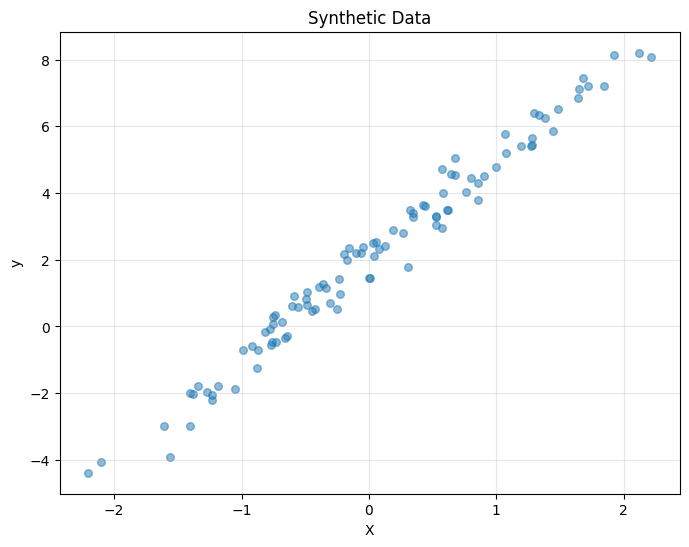

In [20]:
# Visualize data
plt.figure(figsize=(8, 6))
plt.scatter(X.numpy(), y.numpy(), alpha=0.5, s=30)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.grid(True, alpha=0.3)
plt.show()

In [21]:
# Initialize parameters
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

print(f"Initial parameters: w = {w.item():.4f}, b = {b.item():.4f}")

# Training parameters
learning_rate = 0.01
num_epochs = 100

# Training history
losses = []
w_history = []
b_history = []

Initial parameters: w = 0.3932, b = 0.0000


In [22]:
# Training loop
print("Training...")
for epoch in range(num_epochs):
    # Forward pass
    y_pred = w * X + b
    
    # Compute loss (MSE)
    loss = ((y_pred - y) ** 2).mean()
    
    # Backward pass
    loss.backward()
    
    # Update parameters
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    
    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    # Record history
    losses.append(loss.item())
    w_history.append(w.item())
    b_history.append(b.item())
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.4f} | w: {w.item():.4f}, b: {b.item():.4f}")

print(f"\nFinal parameters: w = {w.item():.4f}, b = {b.item():.4f}")
print(f"True parameters:  w = {true_w:.4f}, b = {true_b:.4f}")

Training...
Epoch 10/100 | Loss: 7.9428 | w: 0.8766, b: 0.3951
Epoch 20/100 | Loss: 5.2890 | w: 1.2704, b: 0.7132
Epoch 30/100 | Loss: 3.5448 | w: 1.5912, b: 0.9691
Epoch 40/100 | Loss: 2.3981 | w: 1.8525, b: 1.1750
Epoch 50/100 | Loss: 1.6443 | w: 2.0654, b: 1.3407
Epoch 60/100 | Loss: 1.1485 | w: 2.2390, b: 1.4739
Epoch 70/100 | Loss: 0.8225 | w: 2.3804, b: 1.5811
Epoch 80/100 | Loss: 0.6080 | w: 2.4957, b: 1.6672
Epoch 90/100 | Loss: 0.4669 | w: 2.5896, b: 1.7364
Epoch 100/100 | Loss: 0.3741 | w: 2.6663, b: 1.7920

Final parameters: w = 2.6663, b = 1.7920
True parameters:  w = 3.0000, b = 2.0000


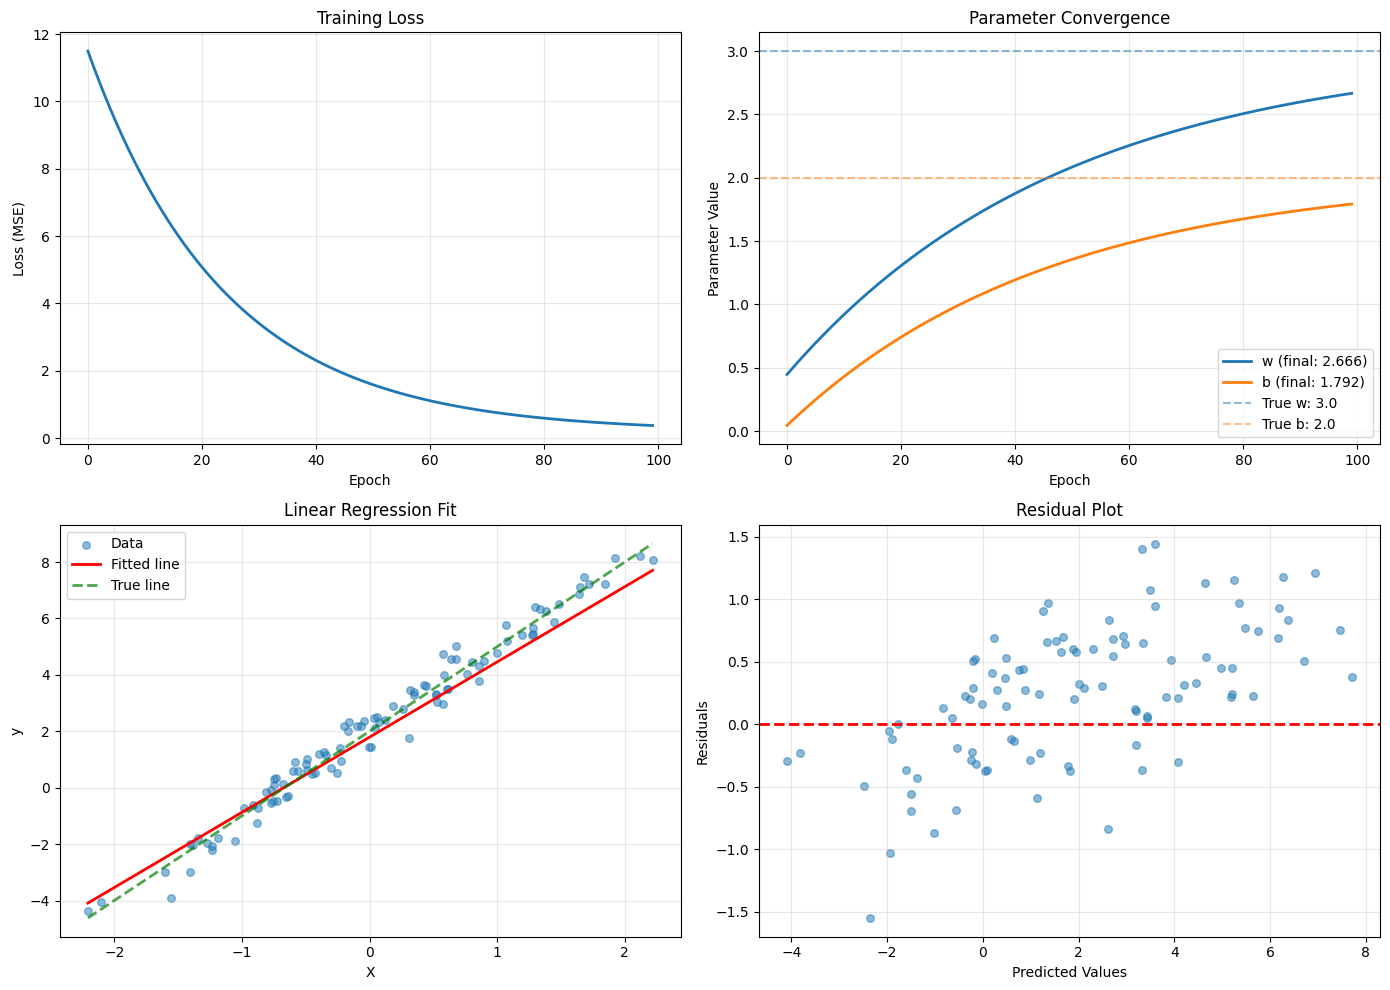

In [23]:
# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Loss curve
axes[0, 0].plot(losses, linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].set_title('Training Loss')
axes[0, 0].grid(True, alpha=0.3)

# 2. Parameter convergence
axes[0, 1].plot(w_history, label=f'w (final: {w.item():.3f})', linewidth=2)
axes[0, 1].plot(b_history, label=f'b (final: {b.item():.3f})', linewidth=2)
axes[0, 1].axhline(y=true_w, color='C0', linestyle='--', alpha=0.5, label=f'True w: {true_w}')
axes[0, 1].axhline(y=true_b, color='C1', linestyle='--', alpha=0.5, label=f'True b: {true_b}')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Parameter Value')
axes[0, 1].set_title('Parameter Convergence')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Data and fit
with torch.no_grad():
    y_pred = w * X + b

X_np = X.numpy()
y_np = y.numpy()
y_pred_np = y_pred.numpy()
sort_idx = X_np.flatten().argsort()

axes[1, 0].scatter(X_np, y_np, alpha=0.5, s=30, label='Data')
axes[1, 0].plot(X_np[sort_idx], y_pred_np[sort_idx], 'r-', linewidth=2, label='Fitted line')
y_true_line = true_w * X + true_b
axes[1, 0].plot(X_np[sort_idx], y_true_line.numpy()[sort_idx], 'g--', linewidth=2, alpha=0.7, label='True line')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('y')
axes[1, 0].set_title('Linear Regression Fit')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals
residuals = (y - y_pred).numpy()
axes[1, 1].scatter(y_pred_np, residuals, alpha=0.5, s=30)
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residual Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

In this notebook, you've learned:

✅ **Tensors:**
- Creating tensors from various sources
- Understanding tensor attributes
- Performing operations (element-wise and matrix multiplication)

✅ **Broadcasting:**
- How broadcasting works
- Common broadcasting patterns

✅ **Device Management:**
- CPU vs GPU placement
- Performance comparisons

✅ **Autograd:**
- Automatic differentiation
- Computing gradients
- Multi-variable functions

✅ **Complete Pipeline:**
- Implementing linear regression from scratch
- Training loop structure
- Visualization

### Next Steps

- Explore the Python scripts in the parent directory for more detailed examples
- Read `part1_foundation.md` for comprehensive explanations
- Move to Part 2 to learn about `torch.nn` and building neural networks